In [43]:
import sys
import numpy as np 
import pandas as pd 

from sklearn import preprocessing

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)

import seaborn as sns
sns.set(style='dark') #white background style for seaborn plots
sns.set(style='darkgrid', color_codes=True)
RED   = '\033[1;31m'  
BLUE  = '\033[1;34m'
CYAN  = '\033[1;36m'
GREEN = '\033[0;32m'

In [44]:
# Get titanic & test csv files as a DataFrame

# Developmental data (train)
train_df = pd.read_csv('train.csv')

# Cross validation data (hold-out testing)
test_df = pd.read_csv('test.csv')

# Preview developmental data
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
# train_df.isnull().any()
# train_df.isnull().any().any()
# train_df['Cabin'].isnull().sum()

In [47]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data Quality & Missing Value Assessment

### Age - Missing Values

Count of missing values: 177, The Proportion of this values with dataset is 19.870

Visualization AGE


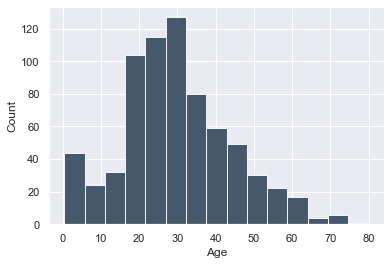

In [49]:
a = sum(pd.isna(train_df.Age)) # Count missing values
b = round(a/(len(train_df.PassengerId)), 4) # Proportion of 'Age' missing in percent
sys.stdout.write(GREEN)
# print('Count of missing values: {}, The Proportion of this values with dataset is {}\n'.format(a, math.floor(x)(b*100)))
# print('Count of missing values: {}, The Proportion of this values with dataset is {}\n'.format(a, np.floor(b*100))) # Works for decimal too
print('Count of missing values: {}, The Proportion of this values with dataset is {}\n'.format(a, '%.3f' % (b*100))) 
print('Visualization AGE')
ax = train_df['Age'].hist(bins=15, color='#34495e', alpha=0.9)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

## Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [50]:
m1 = train_df.Age.median(skipna=True)
m2 = train_df.Age.mean(skipna=True)
sys.stdout.write(CYAN)
print('Median: {} and Mean: {} | Median age is {} as compared to mean which is ~{}'.format(m1, '%.3f' % (m2), m1, np.ceil(m2)))

Median: 28.0 and Mean: 29.699 | Median age is 28.0 as compared to mean which is ~30.0


## Embarked - Missing Values

In [51]:
a = sum(pd.isna(train_df.Embarked)) # Count missing values
b = round(a/len(train_df.PassengerId), 4) # Proportion of "Embarked" missing
sys.stdout.write(CYAN)
print('Count of missing values: {}, Proportion of "Embarked" missing: {}'.format(a, b*100))

Count of missing values: 2, Proportion of "Embarked" missing: 0.22


Visualization Embarked


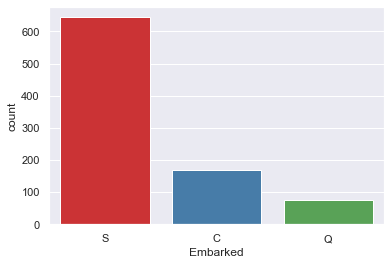

In [52]:
sys.stdout.write(CYAN)
print('Visualization Embarked')
sns.countplot(x='Embarked', data=train_df, palette='Set1')
plt.show()

## Final Adjustments to Data (Train & Test) 
### Based on my assessment of the missing values in the dataset, Making the following changes to the data:

### If "Age" is missing for a given row, Imputing with 28 (median age).

### If "Embark" is missing for a given row, Imputing with "S" (the most common boarding port).

### Ignoring "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with         the passenger's class and fare paid.

In [53]:
# Imputing NaN Values
train_df['Age'].fillna(28, inplace=True)
train_df['Embarked'].fillna('S', inplace=True) 
train_df.drop('Cabin', axis=1, inplace=True)

## Additional Variables 
### According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), we will combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [54]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
# Creating catrgorical variable travelling alone
train_df['TravelBuds'] = train_df['SibSp'] + train_df['Parch']
train_df['TravelAlone'] = np.where(train_df['TravelBuds'] > 0, 0, 1)

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelBuds,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [57]:
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)
train_df.drop('TravelBuds', axis=1, inplace=True)

In [58]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [59]:
# Create categorical variable for Pclass, Embarked and Sex || ONE HOT ENCODING
train2 = pd.get_dummies(train_df, columns=['Pclass'])
train3 = pd.get_dummies(train2, columns=['Embarked'])
train4 = pd.get_dummies(train3, columns=['Sex'], drop_first=True)
# train4.drop('Sex_female', axis=1, inplace=True)

# Drop Unwanted
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)
df_final = train4

In [60]:
final_train = df_final 

In [61]:
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


#### Apply the same changes to the test data. 

In [62]:
test_df['Age'].fillna(28, inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [63]:
test_df['TravelBuds'] = test_df['SibSp'] + test_df['Parch']
test_df['TravelAlone'] = np.where(test_df['TravelBuds'] > 0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('TravelBuds', axis=1, inplace=True)

test2 = pd.get_dummies(test_df, columns=['Pclass'])
test3 = pd.get_dummies(test2, columns=['Embarked'])

test4=pd.get_dummies(test3, columns=['Sex'], drop_first=True)
# test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

In [64]:
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


## Exploratory Data Analysis

Density Plot of Age for Surviving Population and Deceased Population


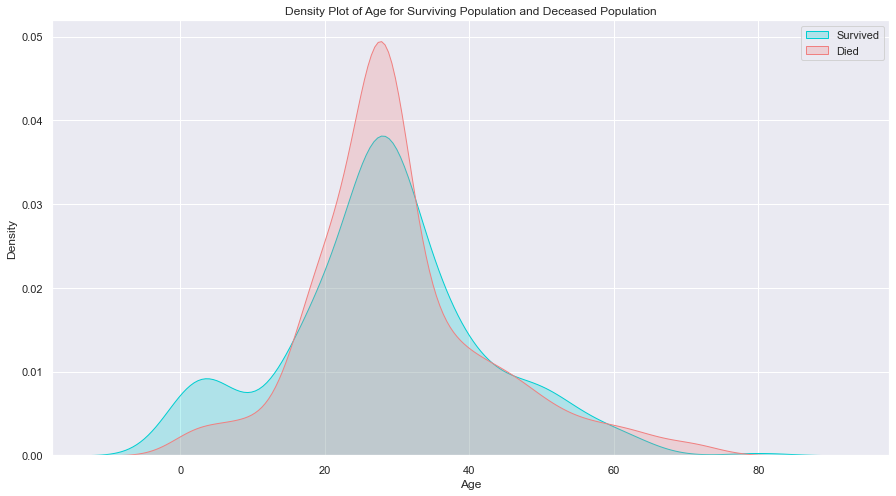

In [65]:
sys.stdout.write(GREEN)
print("Density Plot of Age for Surviving Population and Deceased Population")
plt.figure(figsize=(15,8))
sns.kdeplot(final_train.Age[final_train.Survived == 1], color='darkturquoise', shade=True)
sns.kdeplot(final_train.Age[final_train.Survived == 0], color='lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

## The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

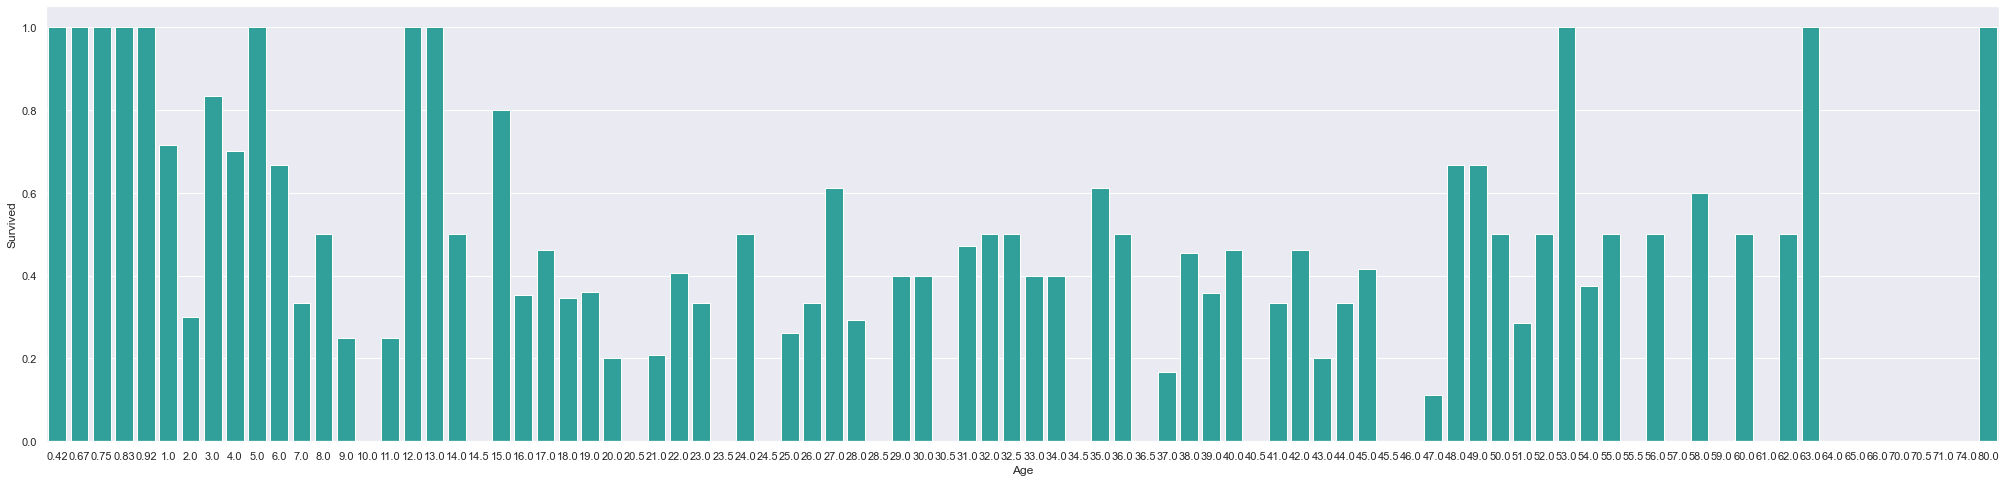

In [66]:
plt.figure(figsize=(35,8))
avg_survival_by_age = final_train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_by_age, color='LightSeaGreen')

## Considering the survival rate of passengers under 16, We will also include another categorical variable in the dataset: "Minor"

In [67]:
(final_train['Age'] == 63).sum()

2

In [68]:
final_train['IsMinor'] = np.where(final_train['Age'] <= 16, 1, 0)
final_test['IsMinor'] = np.where(final_test['Age'] <= 16, 1, 0)

## Exploration of Fare Data

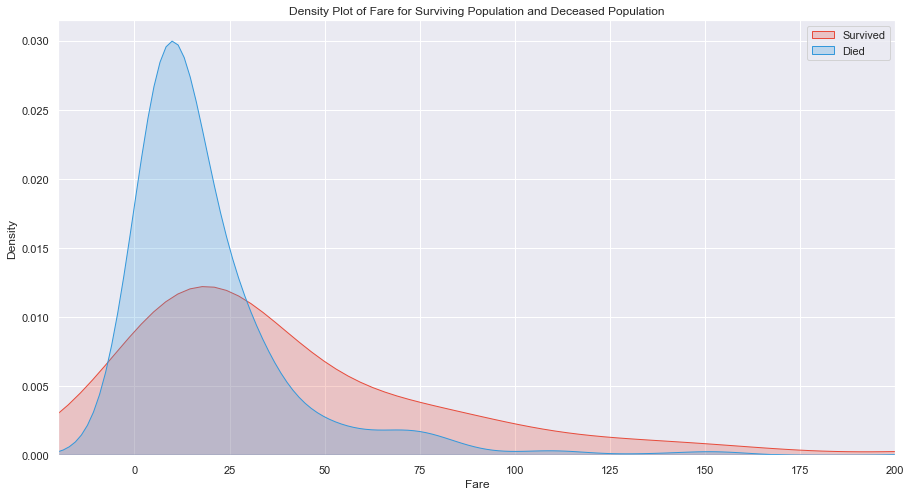

In [69]:
plt.figure(figsize=(15,8))
sns.kdeplot(final_train['Fare'][final_train.Survived == 1], color='#e74c3c', shade=True)
sns.kdeplot(final_train['Fare'][final_train.Survived == 0], color='#3498db', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# Limit x axis to zoom on most information. There are a few outliers in fare. 
# plt.xlabel = 'Fare'
# plt.ylabel = 'Survived'
plt.xlim(-20,200)
plt.show()

## Exploration of Passenger Class

c:\Users\shaur\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


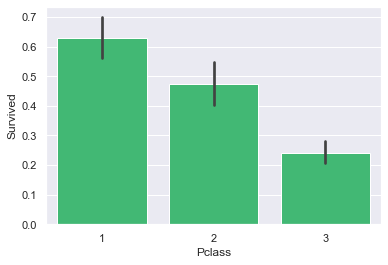

In [70]:
sns.barplot('Pclass', 'Survived', data=train_df, color="#2ecc71")
plt.show()

## Unsurprisingly, being a first class passenger was safest.

## Exploration of Embarked Port

c:\Users\shaur\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


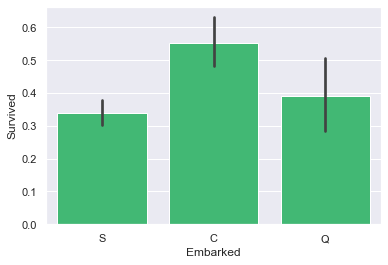

In [71]:
sns.barplot('Embarked', 'Survived', data=train_df, color="#2ecc71")
plt.show()

## Exploration of Traveling Alone vs. With Family

c:\Users\shaur\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


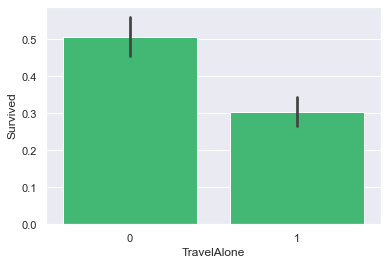

In [72]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="#2ecc71")
plt.show()

## Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

## Logistic Regression

In [73]:
cols = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[cols]
Y = final_train['Survived']

In [74]:
from scipy import stats
import statsmodels.api as sm

In [75]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model = sm.Logit(Y, X)
result = logit_model.fit()
sys.stdout.write(GREEN)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450348
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  0.3237
Time:                        18:47:58   Log-Likelihood:                -401.26
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.627e-78
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0096      0.007     -1.372      0.170      -0.023       0.004
Fare            0.0018    

## Nearly all variables are significant at the 0.05 alpha level, but we'll run the model again without Fare and TravelAlone (removed one at a time, results didn't change much. In the end removed both). I also removed "IsMinor" from this regression, as the information provided is redundant to the Age variable.

In [76]:
cols2 = ['Age', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']  
X2 = df_final[cols2]
Y = df_final['Survived']

logit_model = sm.Logit(Y,X2)
result = logit_model.fit()
sys.stdout.write(GREEN)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.458585
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  0.3113
Time:                        18:47:58   Log-Likelihood:                -408.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.131e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0158      0.006     -2.602      0.009      -0.028      -0.004
Pclass_1       2.0449      0.

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X2, Y)

sys.stdout.write(GREEN)
print('Model Accuracy : {:.2f}%'.format(logreg.score(X2, Y)*100))

Model Accuracy : 79.12%


# Using 75 - 25 split for cross validation.

In [78]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.25)

In [79]:
# Re-fit logistic regression on new train sample

cols2 = ['Age', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male'] 
X3 = train[cols2]
Y3 = train['Survived']
logit_model3 = sm.Logit(Y3, X3)

In [80]:
logreg.fit(X3, Y3)
sys.stdout.write(GREEN)
print('Model Accuracy : {:.2f}%'.format(logreg.score(X3, Y3)*100))

Model Accuracy : 80.69%


## The score for the new training sample (75% of original) is very close to the original performance, which is good!
## Let's assess how well it scores on the 25% testing sample.

In [82]:
# from sklearn import metrics
logreg.fit(X3, Y3)

X3_test = test[cols2]
Y3_test = test['Survived']

Y3test_pred = logreg.predict(X3_test)
sys.stdout.write(GREEN)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)*100))

Accuracy of logistic regression classifier on test set: 76.23


## Assessing the model's performance based on Cross Validation ROC/AUC

In [83]:
# Model's performance in sample AUC

from sklearn.metrics import roc_auc_score
Y3_pred = logreg.predict(X3)

sys.stdout.write(GREEN)
print('Model ROC_AUC : {:.2f}%'.format(roc_auc_score(Y3, Y3_pred)))

Model ROC_AUC : 0.79%


ROC AUC: 0.817


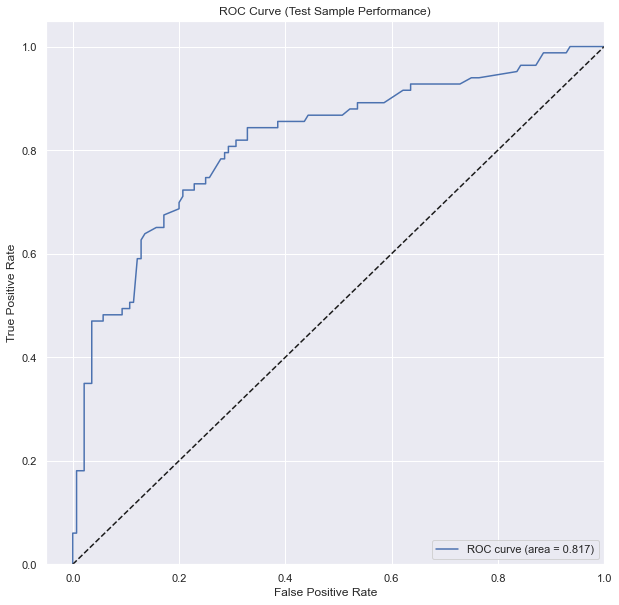

In [84]:
# Visualizing the model's ROC curve 
from sklearn.metrics import roc_curve, auc
# logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
 
# Calculate the AUC
sys.stdout.write(GREEN)
roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc='lower right')
plt.show()

## An AUC score of 0.5 is effectively as good as the flip of a coin, and means that the model really has no classification power at all between the positive and negative occurences(50-50). The AUC for both the test and train samples when run on logistic regression demonstrates relatively strong power of separation between positive and negative occurences (survived - 1, died - 0).

# Logistic Regression Conclusion

## Based on the analysis, if you were to be aboard the Titanic, your chances of survival were best if you fit the following criteria:
### 1) Female
### 2) Young
### 3) In First Class
### 4) Embarked in Cherbourg France



# Decision Trees
## Let's try using a decision tree. There is a tradeoff for the additional complexity of utilizing a decision tree as compared to a logistic regression: Growing the tree to its complete depth can subject your model to overfitting and reduce the predictive power of the model. Therefore set the parameters within the DecisionTreeClassifier from sklearn to help make sure my model is not overfit (too many branches based on the train data). Some trial and error went into this to determine the optimal number of branches to "prune" to achieve strong out-of-sample results.

## Note: The same variables are used for the decision tree as in the first logistic regression model.

In [ ]:
from sklearn import tree

In [ ]:
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_leaf=20)

In [ ]:
cols=['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor'] 

X_DT = df_final[cols]
Y_DT = df_final['Survived']

tree1.fit(X_DT, Y_DT)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

[Text(453.375, 713.475, 'X[7] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(279.0, 509.625, 'X[3] <= 0.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(139.5, 305.775, 'X[4] <= 0.5\ngini = 0.458\nsamples = 220\nvalue = [78, 142]'),
 Text(69.75, 101.92499999999995, 'gini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(209.25, 101.92499999999995, 'gini = 0.145\nsamples = 76\nvalue = [6, 70]'),
 Text(418.5, 305.775, 'X[1] <= 141.077\ngini = 0.062\nsamples = 94\nvalue = [3, 91]'),
 Text(348.75, 101.92499999999995, 'gini = 0.027\nsamples = 73\nvalue = [1, 72]'),
 Text(488.25, 101.92499999999995, 'gini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(627.75, 509.625, 'X[0] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(558.0, 305.775, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(697.5, 305.775, 'X[3] <= 0.5\ngini = 0.28\nsamples = 553\nvalue = [460, 93]'),
 Text(627.75, 101.92499999999995, 'gini = 0.204\nsamples = 433\nvalue = [383, 50]'

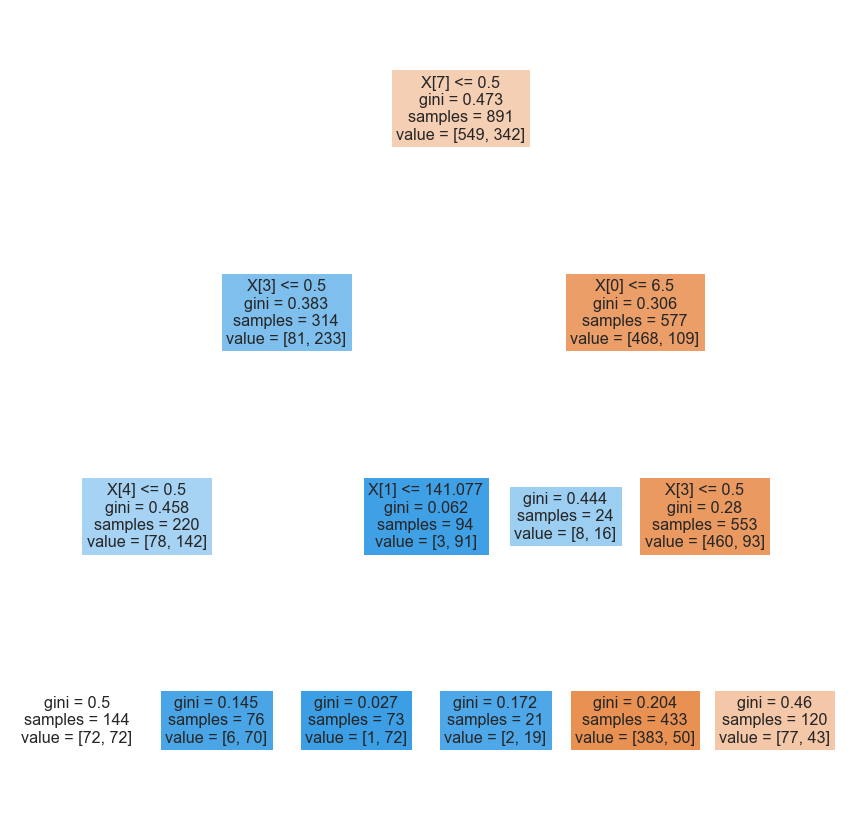

In [ ]:
plt.figure(figsize=(15, 15))
tree.plot_tree(tree1, filled=True)

## Using graphviz

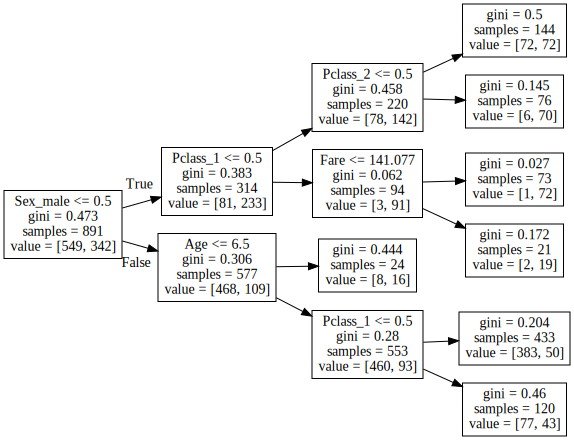

In [ ]:
import graphviz

tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names=X_DT.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz

# Random Forest Estimation
## Random forests, a tree-based machine learning technique, often provide more accurate results than Logistic Regression classifier models.

## A random forest is an estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_DT = df_final[cols]
Y_DT = df_final['Survived']

tree1.fit(X_DT, Y_DT)

In [ ]:
cols = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor'] 
X = df_final[cols]
Y = df_final['Survived']

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
sys.stdout.write(GREEN)
print ('ROC AUC: %0.3f' % random_forest.score(X, Y))

ROC AUC: 0.980


## Test Scores 

In [ ]:
final_test_RF = test[cols]
final_Y = test['Survived']
Y_pred_RF = random_forest.predict(final_test_RF)

In [ ]:
sys.stdout.write(GREEN)
print("Model ROC_AUC : {:.2f}%".format(roc_auc_score(final_Y, Y_pred_RF)))

Model ROC_AUC : 0.97%


# Random Practice (Post Credits :P)

In [ ]:
def find_max(nums):
    max_num = float("-inf") # smaller than all other numbers
    # for num in nums:
    #     if num > max_num:
    #         # (Fill in the missing line here)
    return max_num

In [ ]:
find_max(5)

-inf

In [85]:
z = set('abc')
print(z)
z.add('san')
z.update(set(['p','q']))
print(z)

{'c', 'b', 'a'}
{'san', 'c', 'q', 'p', 'b', 'a'}


In [ ]:
print(2**(3**2), (2**3)**2, (2**3)**3)

512 64 512


In [ ]:
candy={
    "name": 'bv',
    "class": 8
}

In [ ]:
candy['class']

8

In [87]:
skills = ['a', 'c']
skills.insert(1, 'b')

In [88]:
skills

['a', 'b', 'c']

In [90]:
skills.append('d')
skills

['a', 'b', 'c', 'd']

In [91]:
print('-'.join(skills))

a-b-c-d


In [ ]:
newsk = skills.copy()
newsk

['a', 'b', 'c', 'd']

In [ ]:
sk2 = list(skills)
sk2

['a', 'b', 'c', 'd']

In [ ]:
print([1,2,3]==[3,2,1])

False


In [ ]:
print([i.lower() for i in 'TUR'])

['t', 'u', 'r']


In [ ]:
c = ['a', 3]
c

['a', 3]

In [ ]:
A = [1, 2, 3, 4]
B = [sum(A[0:x+1]) for x in range(0, len(A))]
print(B)

[1, 3, 6, 10]


In [105]:
def fun1():
    x = 50 
    return x
t = fun1()
print(t)

50


In [107]:
dat = [1,2,3]
def incr(x):
    return x + 1

# print(list(map(incr, dat)))
print(list(map(incr, dat)))

[2, 3, 4]


In [101]:
t = '%(a)s %(b)s %(c)s %(d)s'
print(t % dict(a='Welcome', b='to', c='the', d='jungle'))

Welcome to the jungle


In [104]:
al = 'abcs'
for i in range(len(al)):
    print(al[i].upper())
print(al)

A
B
C
S
abcs


In [102]:
'The {} side {} {}'.format('bright', 'of', 'life')

'The bright side of life'

In [ ]:
Y = [2, 5, 6]
Y.sort()
print(Y)

[2, 5, 6]


In [1]:
print('this is my world'.capitalize())

This is my world
